# 범죄유형별 소년범죄자 교육정도

##### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
import re
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family='Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus=False)

In [3]:
db1 = pd.read_csv('01_소년범죄자교육정도2019_김관회_1.csv',thousands=',',encoding='utf8')
db1.head()

,분류,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,...,2019.10,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19
0,분류,합계,불취학,초등학교,초등학교,초등학교,중학교,중학교,중학교,고등학교,...,고등학교,전문대학,전문대학,전문대학,대학교,대학교,대학교,대학원,기타,미상
1,분류,소계,소계,재중,중퇴,졸업,재중,중퇴,졸업,재중,...,졸업,재중,중퇴,졸업,재중,중퇴,졸업,소계,소계,소계
2,소계,66247,14,56,17,68,13286,1395,1748,23084,...,4232,550,38,13,1494,43,-,-,-,10717
3,소계,54497,12,51,14,63,12076,1243,1383,18166,...,3336,426,33,11,1128,33,-,-,-,8858
4,소계,27809,7,27,10,44,7404,800,839,9407,...,1483,160,13,4,402,14,-,-,-,2584


##### 컬럼 정렬 

In [4]:
DB1 = db1.rename(columns=(db1.iloc[0]+db1.iloc[1]))
re_DB1 = DB1.drop(DB1.index[0:2])
re_DB1.head()

,분류분류,합계소계,불취학소계,초등학교재중,초등학교중퇴,초등학교졸업,중학교재중,중학교중퇴,중학교졸업,고등학교재중,...,고등학교졸업,전문대학재중,전문대학중퇴,전문대학졸업,대학교재중,대학교중퇴,대학교졸업,대학원소계,기타소계,미상소계
2,소계,66247,14,56,17,68,13286,1395,1748,23084,...,4232,550,38,13,1494,43,-,-,-,10717
3,소계,54497,12,51,14,63,12076,1243,1383,18166,...,3336,426,33,11,1128,33,-,-,-,8858
4,소계,27809,7,27,10,44,7404,800,839,9407,...,1483,160,13,4,402,14,-,-,-,2584
5,절도,17141,4,22,5,28,6125,503,433,5990,...,560,68,3,1,157,5,-,-,-,879
6,장물,175,-,-,1,-,46,2,3,69,...,13,1,-,-,4,-,-,-,-,17


##### 데이터 병합

In [5]:
db1_s1 = re_DB1.loc[2,['초등학교재중','초등학교중퇴','초등학교졸업']].astype(int)
db_s = db1_s1

print(db_s)
print(db_s.sum())

s = pd.DataFrame(db_s)


db1_m1 = re_DB1.loc[2,['중학교재중','중학교중퇴','중학교졸업']].astype(int)
db_m = db1_m1

print(db_m)
print(db_m.sum())

m = pd.DataFrame(db_m)


db1_h1 = re_DB1.loc[2,['고등학교재중','고등학교중퇴','고등학교졸업']].astype(int)
db_h = db1_h1

print(db_h)
print(db_h.sum())

h = pd.DataFrame(db_h)


초등학교재중    56
초등학교중퇴    17
초등학교졸업    68
Name: 2, dtype: int32
141
중학교재중    13286
중학교중퇴     1395
중학교졸업     1748
Name: 2, dtype: int32
16429
고등학교재중    23084
고등학교중퇴     9492
고등학교졸업     4232
Name: 2, dtype: int32
36808


##### 데이터 프레임 병합

In [6]:
# 단위별 데이터프레임을 병합하여 내림차순 정렬

db3 = pd.concat([s,m,h])
db3.columns=['소년범죄자교육정도']

db4 = db3.sort_values('소년범죄자교육정도', ascending=False)
db4 = db4.transpose()
db4

,고등학교재중,중학교재중,고등학교중퇴,고등학교졸업,중학교졸업,중학교중퇴,초등학교졸업,초등학교재중,초등학교중퇴
소년범죄자교육정도,23084,13286,9492,4232,1748,1395,68,56,17


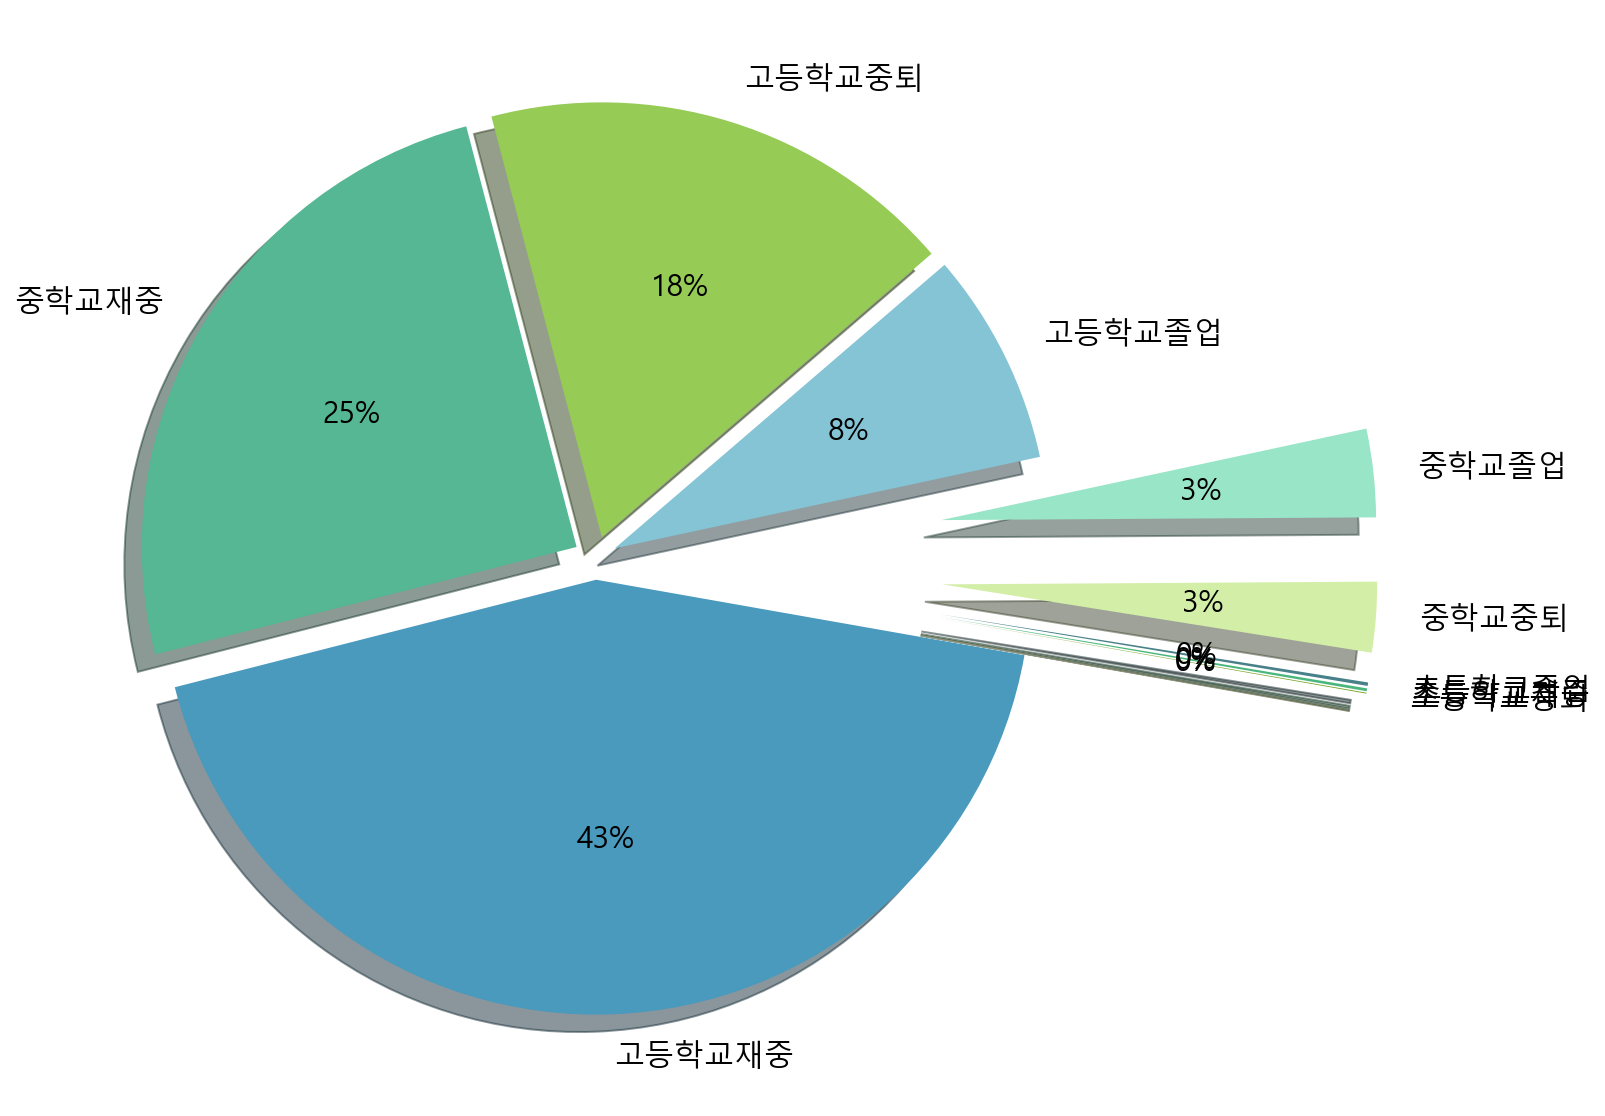

In [7]:
# 소년범죄자교육정도 파이차트 시각화

ratio = [23084, 13286, 9492, 4232, 1748, 1395, 68, 56, 17]
labels = ['고등학교재중','중학교재중','고등학교중퇴','고등학교졸업','중학교졸업','중학교중퇴','초등학교졸업','초등학교재중','초등학교중퇴']
explode = [0.05, 0.05, 0.05, 0.05, 0.8, 0.8, 0.8, 0.8, 0.8]
colors = ['#4A9ABE','#55B794','#96CB55','#85C4D5','#99E5C7','#D3EEA7','#48818A','#49B77D','#729F19']
plt.figure(figsize=(10,10))
plt.rc('font', size=15)
plt.pie(ratio, labels=labels, autopct='%.0f%%', startangle=-10, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

(1000.0, 30000.0)

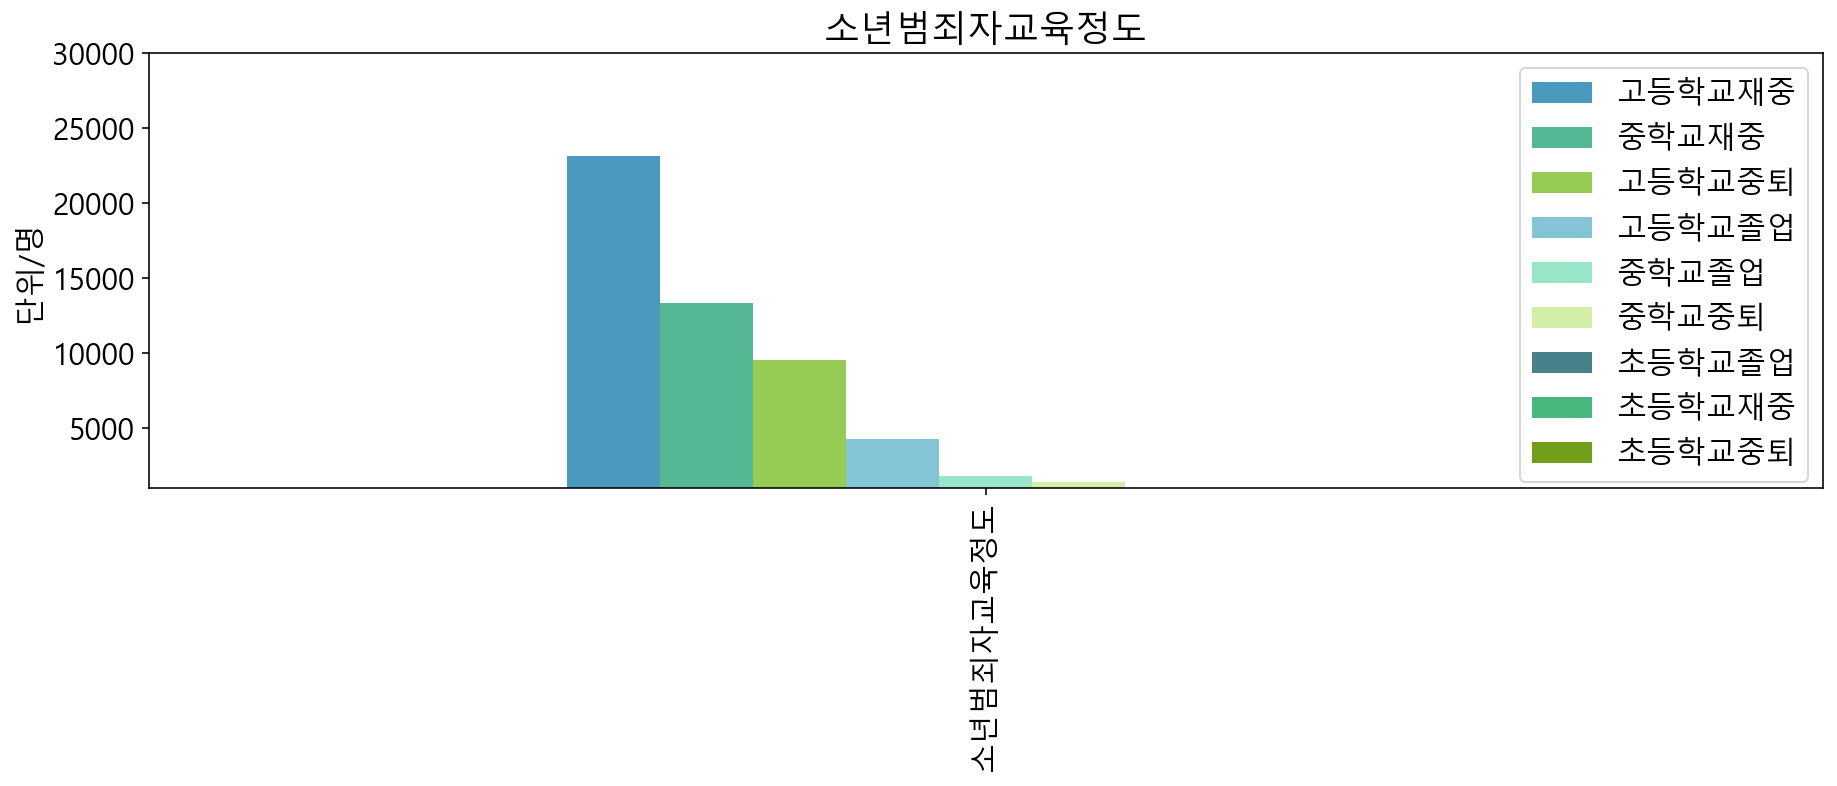

In [8]:
# 내림차순 정렬된 결과 단위/명을 5000명부터로 설정하여 상위 데이터를 시각화

db4.plot.bar(figsize=(15,4),color=colors)
colors = ['#4A9ABE','#55B794','#96CB55','#85C4D5','#99E5C7','#D3EEA7','#48818A','#49B77D','#729F19']
plt.title("소년범죄자교육정도")
plt.ylabel("단위/명")
plt.ylim(1000,30000)

###### 소년범죄자 교육 정도에 따른 분석 결과 고등학교 재학 중인 경우가 월등히 앞서있고, 중학교 재학 중, 고등학교 중퇴 순으로 나타났다. 위 결과를 좀 더 명확하게 입증 할 수 있는 유사치 데이터를 아래 다음과 같이 첨부하였다.

In [9]:
db6 = pd.read_csv('01_학교생활만족도_김관회_2.csv',encoding='utf8')
db6 = db6.rename(columns=db6.iloc[0]+db6.iloc[1])
db6 = db6.drop('응답자유형별(1)응답자유형별(1)', axis=1)
db6 = db6.drop(db6.index[0:2])
db6 = db6.drop(db6.index[8:])

db6 = db6.transpose()

db6 = db6.rename(columns=db6.iloc[0])
db6 = db6.drop(db6.index[0])
db6 = db6.drop(db6.columns[[0,1,2,6,7]], axis=1)
db6

,초등학교,중학교,고등학교
친구들이 존중하고 배려한다전혀 그렇지 않다,0.9,0.4,0.6
친구들이 존중하고 배려한다그렇지 않은 편이다,5.1,2.9,2.7
친구들이 존중하고 배려한다그런 편이다,61.8,60.6,55.9
친구들이 존중하고 배려한다매우 그렇다,32.2,36.1,40.7
선생님은 학생들을 존중한다전혀 그렇지 않다,0.5,0.6,1.5
선생님은 학생들을 존중한다그렇지 않은 편이다,1.4,2.7,4.2
선생님은 학생들을 존중한다그런 편이다,34.2,54.4,56.7
선생님은 학생들을 존중한다매우 그렇다,63.8,42.3,37.6
나는 수업시간이 재밌다전혀 그렇지 않다,4.4,7.1,6.9
나는 수업시간이 재밌다그렇지 않은 편이다,18.1,25.2,24.3


In [10]:
db6['고등학교'] = db6['고등학교'].astype(float)
db6['중학교'] = db6['중학교'].astype(float)
db6['초등학교'] = db6['초등학교'].astype(float)

(0.0, 100.0)

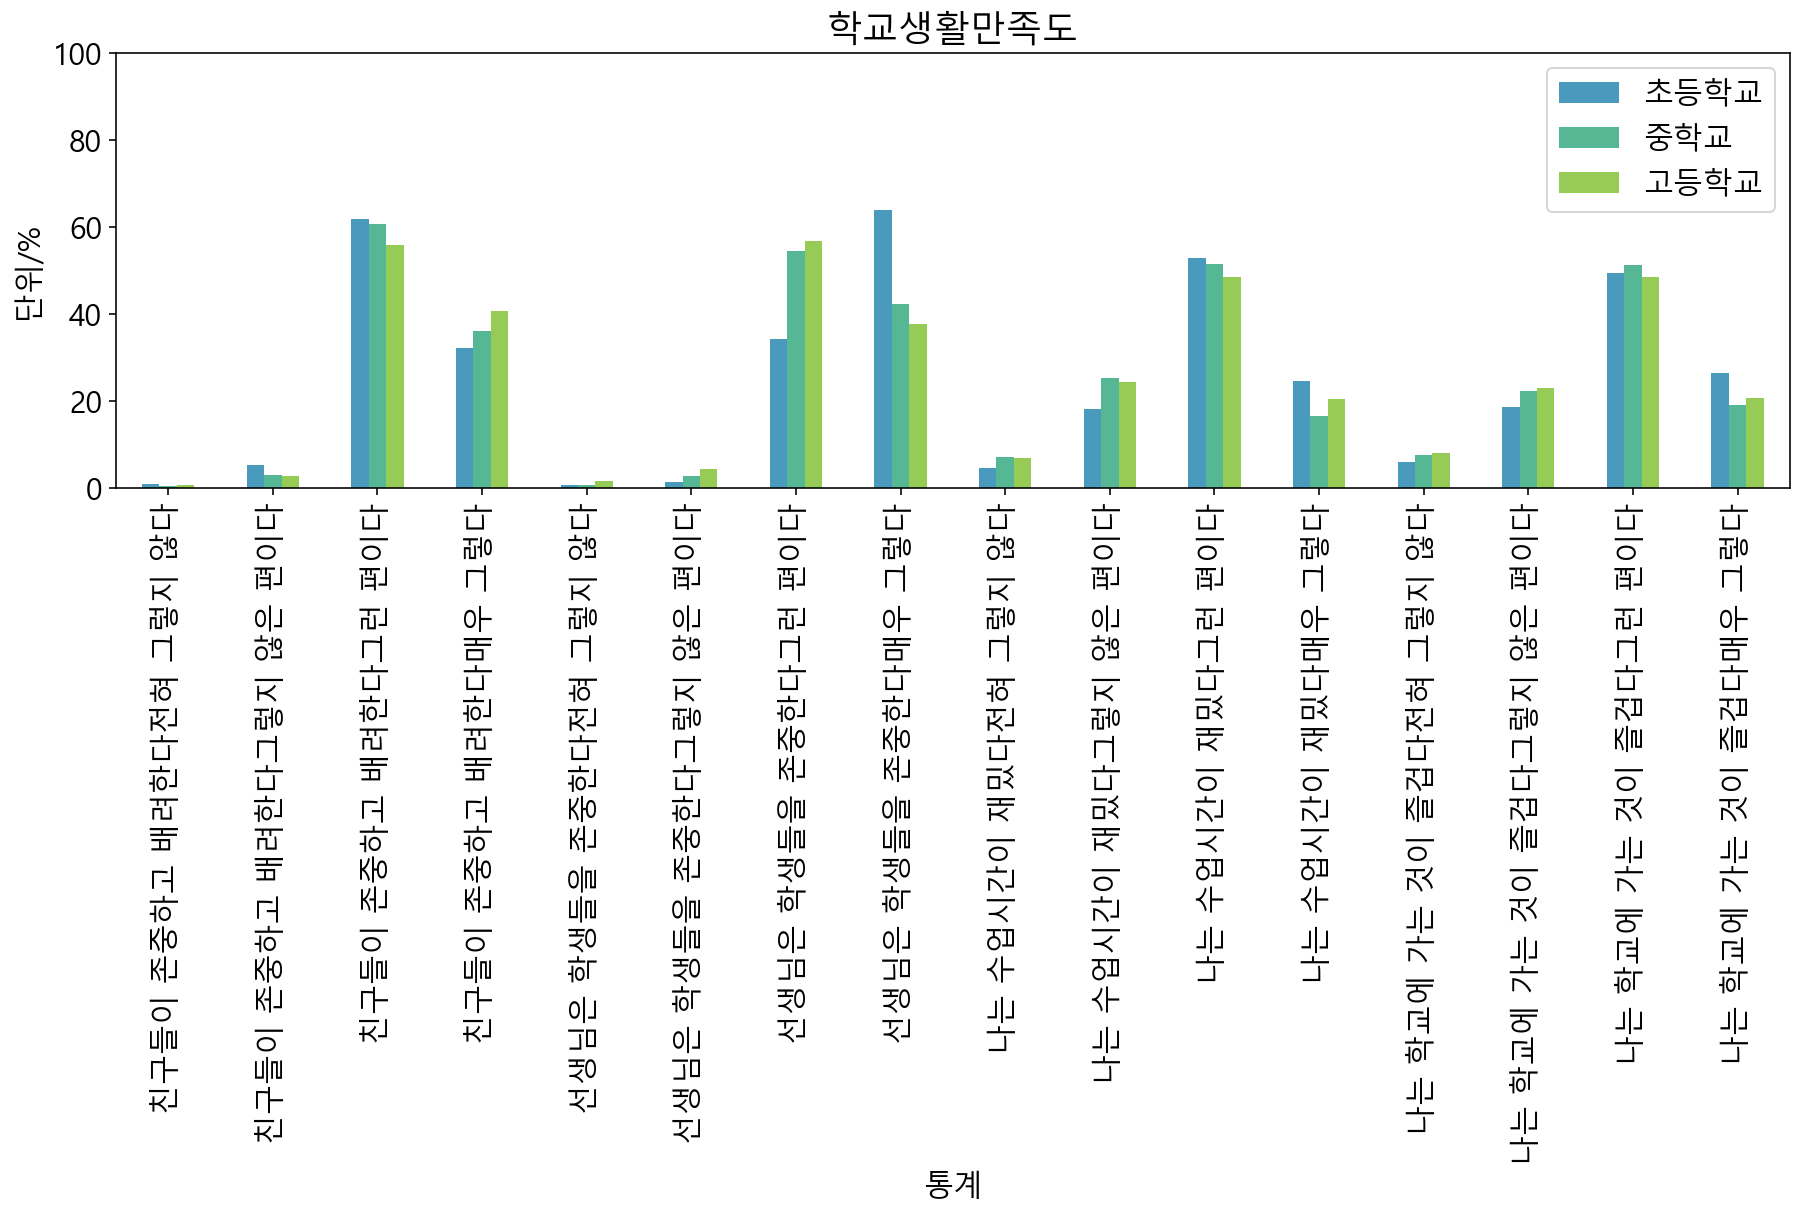

In [11]:
db6.plot.bar(figsize=(15,4), color=colors)
colors = ['#96CB55','#55B794','#4A9ABE']
plt.title("학교생활만족도")
plt.xlabel("통계")
plt.ylabel("단위/%")
plt.ylim(0,100)

###### 학교에 대한 부정적인 인식이 중고등학교 모두 30% 내외 상당히 높은 수치를 보여주고 있다.

# 

## 상관관계 분석 : 소년범죄자교육정도와 학교생활만족도 상관관계

In [12]:
db4['고등학교재중'] = db4['고등학교재중'].astype('float')
db4['중학교재중'] = db4['중학교재중'].astype('float')
db4['고등학교중퇴'] = db4['고등학교중퇴'].astype('float')
db4['고등학교졸업'] = db4['고등학교졸업'].astype('float')
db4['중학교졸업'] = db4['중학교졸업'].astype('float')
db4['중학교중퇴'] = db4['중학교중퇴'].astype('float')
db4['초등학교졸업'] = db4['초등학교졸업'].astype('float')
db4['초등학교재중'] = db4['초등학교재중'].astype('float')
db4['초등학교중퇴'] = db4['초등학교중퇴'].astype('float')
print(db4.dtypes)

고등학교재중    float64
중학교재중     float64
고등학교중퇴    float64
고등학교졸업    float64
중학교졸업     float64
중학교중퇴     float64
초등학교졸업    float64
초등학교재중    float64
초등학교중퇴    float64
dtype: object


In [13]:
db4['초등학교'] = db4[['초등학교재중','초등학교중퇴','초등학교졸업']].mean(axis=1)
db4['중학교'] = db4[['중학교재중','중학교중퇴','중학교졸업']].mean(axis=1)
db4['고등학교'] = db4[['고등학교재중','고등학교중퇴','고등학교졸업']].mean(axis=1)
db4.round(decimals=1)

,고등학교재중,중학교재중,고등학교중퇴,고등학교졸업,중학교졸업,중학교중퇴,초등학교졸업,초등학교재중,초등학교중퇴,초등학교,중학교,고등학교
소년범죄자교육정도,23084.0,13286.0,9492.0,4232.0,1748.0,1395.0,68.0,56.0,17.0,47.0,5476.3,12269.3


## 상관관계 분석 : 소년범죄자교육정도 평균값 계산하여 학교생활만족도 행에 추가

In [14]:
# 초등학교 중학교 고등학교 평균치 퍼센트 계산

db4_1 = db4[['고등학교','중학교','초등학교']]
db4_1 = db4_1.round(decimals=1)

db4_1_h = db4_1['고등학교']/(db4_1['고등학교']+db4_1['중학교']+db4_1['초등학교'])*100
db4_1_m = db4_1['중학교']/(db4_1['고등학교']+db4_1['중학교']+db4_1['초등학교'])*100
db4_1_s = db4_1['초등학교']/(db4_1['고등학교']+db4_1['중학교']+db4_1['초등학교'])*100
db4_1['고등학교'] = db4_1_h
db4_1['중학교'] = db4_1_m
db4_1['초등학교'] = db4_1_s

db_c = pd.concat([db6,db4_1])
db_c.round(decimals=1)

,초등학교,중학교,고등학교
친구들이 존중하고 배려한다전혀 그렇지 않다,0.9,0.4,0.6
친구들이 존중하고 배려한다그렇지 않은 편이다,5.1,2.9,2.7
친구들이 존중하고 배려한다그런 편이다,61.8,60.6,55.9
친구들이 존중하고 배려한다매우 그렇다,32.2,36.1,40.7
선생님은 학생들을 존중한다전혀 그렇지 않다,0.5,0.6,1.5
선생님은 학생들을 존중한다그렇지 않은 편이다,1.4,2.7,4.2
선생님은 학생들을 존중한다그런 편이다,34.2,54.4,56.7
선생님은 학생들을 존중한다매우 그렇다,63.8,42.3,37.6
나는 수업시간이 재밌다전혀 그렇지 않다,4.4,7.1,6.9
나는 수업시간이 재밌다그렇지 않은 편이다,18.1,25.2,24.3


## 상관관계 분석 : 행과 열 그룹화

In [15]:
db_c['분석'] = ['친구들이 존중하고 배려한다전혀 그렇지 않다',
              '친구들이 존중하고 배려한다그렇지 않은 편이다',
              '친구들이 존중하고 배려한다그런 편이다',
              '친구들이 존중하고 배려한다매우 그렇다',
             '선생님은 학생들을 존중한다전혀 그렇지 않다',
             '선생님은 학생들을 존중한다그렇지 않은 편이다',
             '선생님은 학생들을 존중한다그런 편이다',
             '선생님은 학생들을 존중한다매우 그렇다',
             '나는 수업시간이 재밌다전혀 그렇지 않다',
             '나는 수업시간이 재밌다그렇지 않은 편이다',
             '나는 수업시간이 재밌다그런 편이다',
             '나는 수업시간이 재밌다매우 그렇다',
             '나는 학교에 가는 것이 즐겁다전혀 그렇지 않다',
             '나는 학교에 가는 것이 즐겁다그렇지 않은 편이다',
             '나는 학교에 가는 것이 즐겁다그런 편이다',
             '나는 학교에 가는 것이 즐겁다매우 그렇다',
             '소년범죄자교육정도']

db_c = db_c.set_index('분석')

db_c_t = db_c.transpose()
db_c_t['학생'] = ['초등학교','중학교','고등학교']
db_c_t = db_c_t.set_index('학생')

db_c_t

분석,친구들이 존중하고 배려한다전혀 그렇지 않다,친구들이 존중하고 배려한다그렇지 않은 편이다,친구들이 존중하고 배려한다그런 편이다,친구들이 존중하고 배려한다매우 그렇다,선생님은 학생들을 존중한다전혀 그렇지 않다,선생님은 학생들을 존중한다그렇지 않은 편이다,선생님은 학생들을 존중한다그런 편이다,선생님은 학생들을 존중한다매우 그렇다,나는 수업시간이 재밌다전혀 그렇지 않다,나는 수업시간이 재밌다그렇지 않은 편이다,나는 수업시간이 재밌다그런 편이다,나는 수업시간이 재밌다매우 그렇다,나는 학교에 가는 것이 즐겁다전혀 그렇지 않다,나는 학교에 가는 것이 즐겁다그렇지 않은 편이다,나는 학교에 가는 것이 즐겁다그런 편이다,나는 학교에 가는 것이 즐겁다매우 그렇다,소년범죄자교육정도
학생,,,,,,,,,,,,,,,,,
초등학교,0.9,5.1,61.8,32.2,0.5,1.4,34.2,63.8,4.4,18.1,52.9,24.6,5.8,18.5,49.3,26.4,0.264155
중학교,0.4,2.9,60.6,36.1,0.6,2.7,54.4,42.3,7.1,25.2,51.4,16.4,7.5,22.2,51.3,18.9,30.778526
고등학교,0.6,2.7,55.9,40.7,1.5,4.2,56.7,37.6,6.9,24.3,48.5,20.3,7.9,22.9,48.5,20.7,68.957319


## 상관관계 분석 : corr, corrwith 사용하여 각 변수들과의 관계 확인

In [16]:
db_c_t['소년범죄자교육정도'].corr(db_c_t['나는 학교에 가는 것이 즐겁다전혀 그렇지 않다'])

0.9180798835288512

In [17]:
db_c_t['소년범죄자교육정도'].corr(db_c_t['나는 학교에 가는 것이 즐겁다그렇지 않은 편이다'])

0.9050294815618217

In [18]:
corrdata = db_c_t.corrwith(db_c_t.소년범죄자교육정도).round(2)
corrdata

분석
친구들이 존중하고 배려한다전혀 그렇지 않다      -0.54
친구들이 존중하고 배려한다그렇지 않은 편이다     -0.87
친구들이 존중하고 배려한다그런 편이다         -0.96
친구들이 존중하고 배려한다매우 그렇다          1.00
선생님은 학생들을 존중한다전혀 그렇지 않다       0.93
선생님은 학생들을 존중한다그렇지 않은 편이다      1.00
선생님은 학생들을 존중한다그런 편이다          0.88
선생님은 학생들을 존중한다매우 그렇다         -0.91
나는 수업시간이 재밌다전혀 그렇지 않다         0.79
나는 수업시간이 재밌다그렇지 않은 편이다        0.76
나는 수업시간이 재밌다그런 편이다           -0.99
나는 수업시간이 재밌다매우 그렇다           -0.47
나는 학교에 가는 것이 즐겁다전혀 그렇지 않다     0.92
나는 학교에 가는 것이 즐겁다그렇지 않은 편이다    0.91
나는 학교에 가는 것이 즐겁다그런 편이다       -0.34
나는 학교에 가는 것이 즐겁다매우 그렇다       -0.68
소년범죄자교육정도                     1.00
dtype: float64

<AxesSubplot:xlabel='분석', ylabel='학생'>

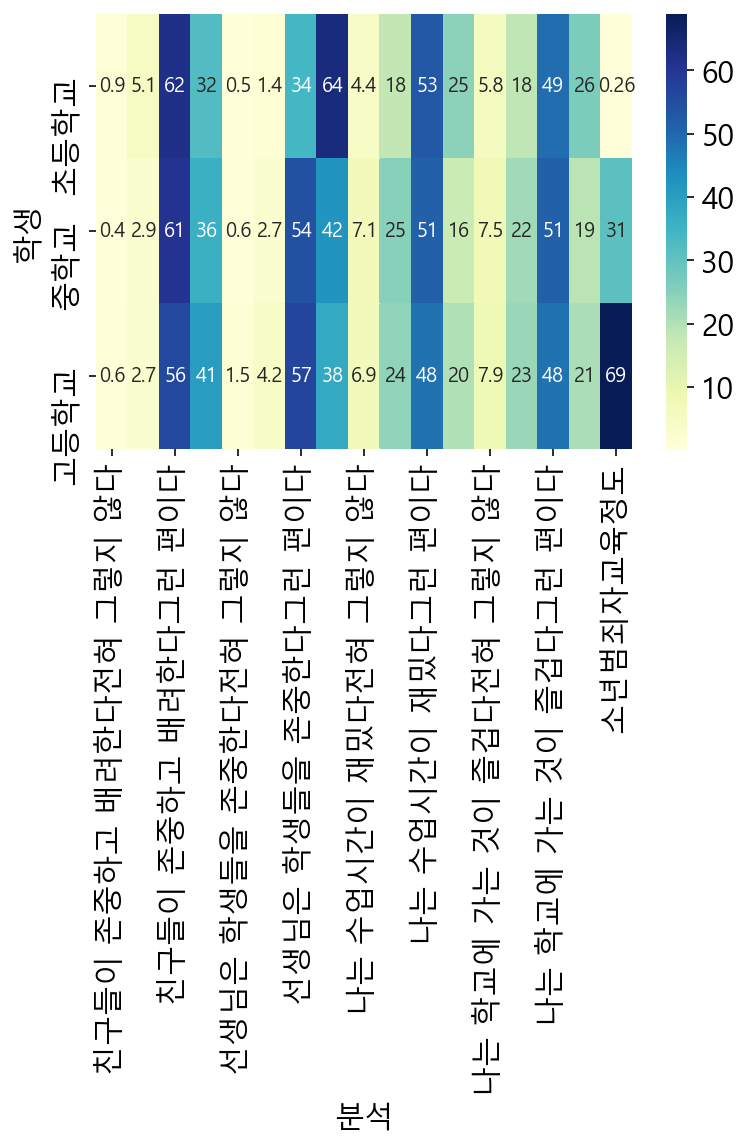

In [19]:
sns.heatmap(data=db_c_t, annot=True, annot_kws={'size':10}, cmap='YlGnBu')

# 

# 